
## Decision Tree Regression


## Importing the libraries

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Start stopwatch

In [2]:

from time import process_time
time_start = process_time() 


## Import the dataset

In [3]:

X = pd.read_csv('/Users/rafavarela/Projects/MLhub/data/regression/features.csv')
y = pd.read_csv('/Users/rafavarela/Projects/MLhub/data/regression/labels.csv')


### Categorize dataset

In [4]:
def categorize_column(dataframe, category_threshold, column):
    
    uniq = dataframe[column].unique()
    if len(uniq) <= category_threshold:
        dataframe[column] = dataframe[column].astype('category').cat.codes
        

def categorize_dataframe(dataframe, category_threshold):
    for c in dataframe.columns:
        categorize_column(dataframe, category_threshold, c)
        
categorize_dataframe(X, 10)
categorize_dataframe(y, 10)
X = X.values
y = y.values


## Splitting the dataset into the Training set and Test set

In [5]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.1,
                        train_size=None,
                        random_state=0,
                        shuffle=0,
                        stratify=X if "None" == "features" else y if "None" == "labels" else None)


## Training the Simple Decision Tree model on the Training set

In [6]:

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion="absolute_error", splitter="best", 
                            max_depth=None, 
                            min_samples_split= 2,
                            min_samples_leaf= 1,
                            min_weight_fraction_leaf= 0.0,
                            max_features=None if "None".isnumeric() or "None" == "None" else "None",
                            random_state= None,
                            max_leaf_nodes= 3,
                            min_impurity_decrease= 15.1,
                            ccp_alpha= 0.0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='absolute_error', max_leaf_nodes=3,
                      min_impurity_decrease=15.1)

## Predicting the Test set results

In [7]:

y_pred = regressor.predict(X_test)


## Evaluating the Model Performance

R2 Score: 0.7837736333002069
RMSE: 18126.56184917427
MAE: 13484.312


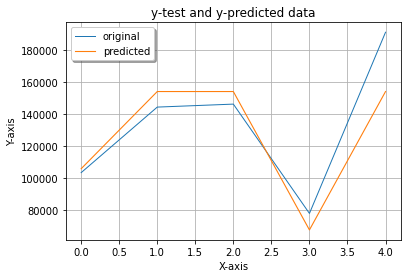

Elapsed CPU Time: 1.12 seconds


In [8]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
mae = mean_absolute_error(y_test, y_pred)
print(f'R2 Score: {r2_score}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

time_stop = process_time()
cpu_time = round(time_stop - time_start, 2)
print(f'Elapsed CPU Time: {cpu_time} seconds')


## Saving Model Statistics

In [9]:

import os
import json

path = 'statistics'
if not os.path.exists(path):
    os.mkdir(path)

stats = {
    "R2 Score": r2_score,
    "RMSE": rmse,
    "MAE": mae,
    "cpu time": cpu_time,
    "predicted": y_pred.flatten().tolist(), 
    "real": y_test.flatten().tolist()
}

with open(os.path.join(path, "decision_tree_regression_ab72b314-7d27-11ec-b009-b62bca79ceda.json"), "w") as f:
    json.dump(stats, f, ensure_ascii=False, indent=4)
